# Double-Layer Analysis

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Tracing Magnetic Field Lines

I choose RK45 method to trace the magnetic field.  
Reference:  
Press, William H. Numerical recipes 3rd edition: The art of scientific computing.
Cambridge university press, 2007. Chapter 17.2.

The methods uses two parameters, atot and rtol, to calculate the errors of each step. The two parameters and absolute and relative errors. Below are test cases to decide the values for atol and rtol.

### atot = rtol = $10^{-4}$

Total number of points:  40


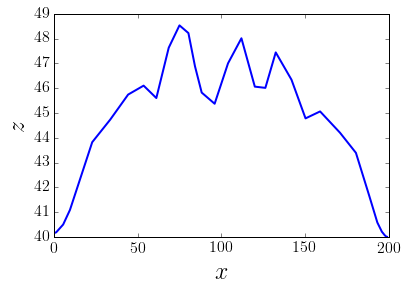

In [24]:
run field_line_plot.py

The field line is not smooth, suggesting the errors of each step is too large.

### atot = rtol = $10^{-5}$

Total number of points:  115


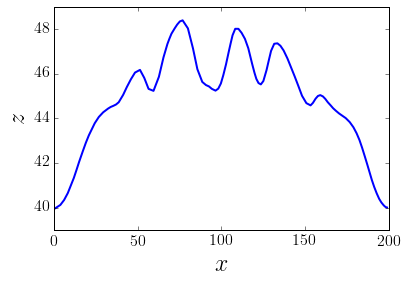

In [23]:
run field_line_plot.py

The field line looks much smoother. The total number of points increase to 115, so it requires more calculation.

### atot = rtol = $10^{-6}$

Total number of points:  658


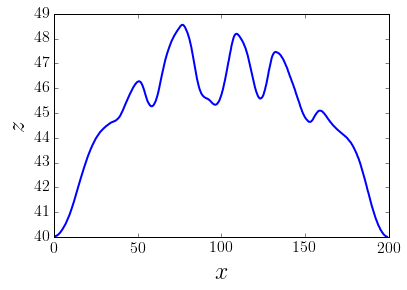

In [25]:
run field_line_plot.py

The field line is even smoother, but it also takes much more steps to trace the filed line. So I think atol = rtol = $10^{-5}$ is a relative good choice for field line tracing.

### A different point with atot = rtol = $10^{-5}$

Total number of points:  108


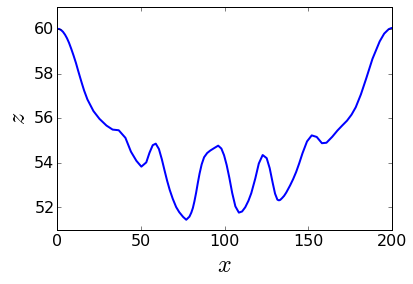

In [3]:
run field_line_plot.py

## Parallel Potential

In [2]:
import contour_plots
from contour_plots import *
from scipy import signal

In [3]:
pic_info = pic_information.get_pic_info('../../')

In [4]:
kwargs = {"current_time":20, "xl":0, "xr":200, "zb":-50, "zt":50}

In [5]:
x, z, phi_para = read_2d_fields(pic_info, "../../data1/phi_para.gda", **kwargs)
xmin = np.min(x)
xmax = np.max(x)
zmin = np.min(z)
zmax = np.max(z)

Reading data from  ../../data1/phi_para.gda
The spatial range (di):  x_left =  0 x_right =  200 z_bottom =  -50 z_top =  50


In [6]:
kwargs = {"current_time":19, "xl":0, "xr":200, "zb":-50, "zt":50}
x, z, phi_para1 = read_2d_fields(pic_info, "../../data1/phi_para.gda", **kwargs)
kwargs = {"current_time":21, "xl":0, "xr":200, "zb":-50, "zt":50}
x, z, phi_para2 = read_2d_fields(pic_info, "../../data1/phi_para.gda", **kwargs)

Reading data from  ../../data1/phi_para.gda
The spatial range (di):  x_left =  0 x_right =  200 z_bottom =  -50 z_top =  50
Reading data from  ../../data1/phi_para.gda
The spatial range (di):  x_left =  0 x_right =  200 z_bottom =  -50 z_top =  50


Calculated parallel potential.

In [12]:
ng = 5
kernel = np.ones((ng,ng)) / float(ng*ng)
phi_para_new = signal.convolve2d(phi_para, kernel)

In [149]:
phi_para_new = signal.medfilt2d(phi_para, kernel_size=(5,5))

In [13]:
phi_para_new = signal.convolve2d((phi_para + phi_para1 + phi_para2) / 3, kernel)

In [14]:
phi_para_new[np.where(phi_para_new == 0.0)] = np.nan

(-10, 10)

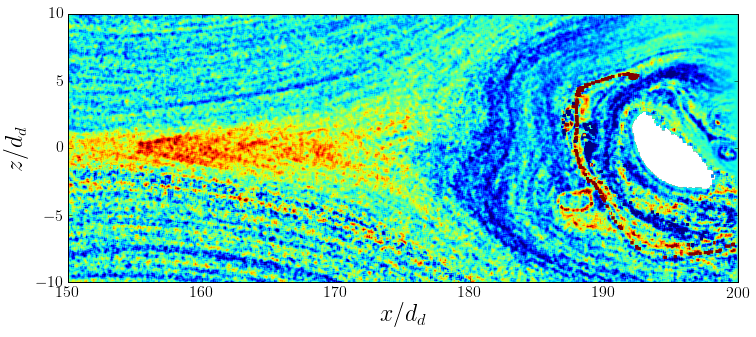

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
im1 = ax.imshow(phi_para_new, vmin=-0.03, vmax=0.05, origin='lower', 
                cmap=plt.cm.jet, extent=[xmin, xmax, zmin, zmax])
ax.tick_params(labelsize=16)
ax.set_xlabel(r'$x/d_d$', fontsize=24)
ax.set_ylabel(r'$z/d_d$', fontsize=24)
ax.set_xlim([150, 200])
ax.set_ylim([-10, 10])